# 機率與統計（Probability and Statistics）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

## 機率
真實世界的許多事件帶有不確定性  
無法用傳統的數學運算來描述  
但還是可以用機率來更了解細節

比如說  
假設班上 50 人，每個人遲到的機率是 0.05  
班上出席人數 $\geq 45$ 的機率是多少？

Sage 中有一個 `random` 函數  
Python 中有一個 `random` 套件  
為了和先前的教材一致  
這邊使用 NumPy 中的 `random` 模組來模擬隨機事件

In [1]:
import numpy as np

`np.random.choice(list)` 會在 `list` 中隨機挑一個出來  
（每一個元素的機率一樣）

In [2]:
np.random.choice([1,2,3])

2

模擬一個學生是否出席

In [3]:
def present():
    # 0: absent
    # 1: present
    return np.random.choice([0]*5 + [1]*95)

In [4]:
present()

1

模擬一班學生出席人數

In [5]:
def a_class(students=50):
    total = 0
    for _ in range(students):
        total += present()
    return total

In [6]:
a_class()

47

機率 $\sim$ 事件發生次數 / 總次數

In [7]:
trials = 1000
counter = 0
for _ in range(trials):
    if a_class() >= 45:
        counter += 1
print("probability ~ %s"%N(counter/trials))

probability ~ 0.952000000000000


### 隨機變數
一個隨機變數 $X$  
可能有許多不同的數值  
而每個數值都有它發生的機率

比如說  
$X$ 可以是班上出席的人數  
雖然說每次都不知道 $X$ 確切的數值為多少  
但知道 $X\geq 45$ 的機率非常高

In [8]:
X = a_class
X()

49

In [9]:
X() >= 45

True

#### 分布
由於隨機變數的不確定性  
通常我們用隨機變數的**分布**  
來描述一個隨機變數  

將一個隨機變數執行許多次  
並記錄各個數值發生的次數  
可以用來模擬一個隨機變數的分布

In [10]:
X = a_class
dist = [X() for _ in range(1000)]
dist

[47,
 47,
 49,
 46,
 49,
 48,
 45,
 48,
 48,
 48,
 47,
 49,
 43,
 45,
 48,
 48,
 49,
 48,
 49,
 47,
 48,
 47,
 48,
 50,
 50,
 47,
 48,
 49,
 48,
 47,
 47,
 47,
 49,
 50,
 44,
 49,
 46,
 50,
 46,
 48,
 47,
 47,
 49,
 48,
 48,
 44,
 49,
 47,
 46,
 47,
 49,
 49,
 49,
 48,
 50,
 44,
 48,
 44,
 46,
 49,
 49,
 46,
 48,
 48,
 48,
 48,
 47,
 48,
 48,
 45,
 46,
 49,
 46,
 50,
 50,
 47,
 48,
 48,
 47,
 44,
 50,
 46,
 44,
 48,
 50,
 49,
 42,
 48,
 45,
 48,
 49,
 48,
 46,
 50,
 46,
 48,
 48,
 49,
 47,
 46,
 48,
 48,
 48,
 48,
 46,
 45,
 46,
 45,
 43,
 46,
 46,
 44,
 46,
 45,
 47,
 49,
 50,
 44,
 48,
 44,
 50,
 48,
 48,
 45,
 46,
 46,
 46,
 49,
 48,
 49,
 49,
 48,
 46,
 48,
 47,
 49,
 48,
 47,
 49,
 49,
 46,
 49,
 47,
 50,
 49,
 46,
 50,
 50,
 46,
 46,
 49,
 45,
 45,
 46,
 48,
 46,
 48,
 48,
 48,
 48,
 49,
 49,
 47,
 48,
 49,
 47,
 48,
 48,
 49,
 47,
 49,
 48,
 48,
 48,
 46,
 48,
 46,
 48,
 47,
 50,
 47,
 45,
 49,
 44,
 48,
 46,
 49,
 46,
 46,
 47,
 45,
 45,
 50,
 49,
 47,
 48,
 45,
 48,
 47,
 47,


`matplotlib` 是 Python 裡一個繪圖的套件  
其中的 `pyplot` 有許多常用的繪圖函數  
`hist` 代表的是 histogram（直方圖）  
`hist(list)` 可以自動記算 `list` 中數字出現的次數並畫成圖表

(array([  1.,   2.,   9.,  36.,  53., 139., 214., 251., 202.,  93.]),
 array([41. , 41.9, 42.8, 43.7, 44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <BarContainer object of 10 artists>)

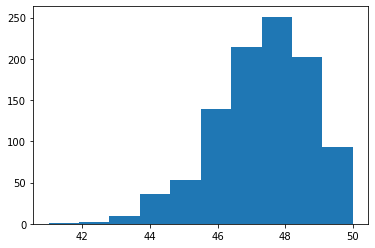

In [11]:
import matplotlib.pyplot as plt
plt.hist(dist)

#### 伯努利分布
若一個隨機變數 $X$ 的可能數值為 $1$ 或 $0$  
且出現機率各為 $p$ 和 $1-p$    
則我們說 $X$ 服從**伯努利分布**

In [12]:
X = lambda :np.random.choice([0,1]) # p = 0.5

In [13]:
X()

0

(array([503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

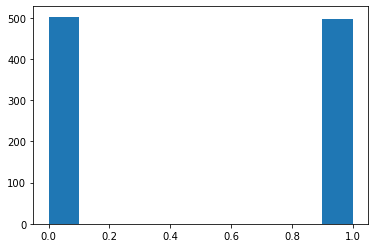

In [14]:
dist = [X() for _ in range(1000)]
plt.hist(dist)

#### 二項分布
假設有 $n$ 個機率為 $p$ 的伯努利分布  
（各個隨機變數彼此獨立）  
令 $X$ 為這 $n$ 個隨機變數的總和  
則我們說 $X$ 服從**二項分布**

常見的二項分布如擲硬幣（$p=0.5$）  
擲 $n$ 次硬幣中出現正面的次數服從二項分布

In [15]:
X = lambda :np.random.choice([0,1]) # p = 0.5

def roll_n_coins(n):
    total = 0
    for _ in range(n):
        total += X()
    return total

In [16]:
roll_n_coins(100)

37

(array([ 14.,  46., 100., 160., 223., 215., 133.,  86.,  17.,   6.]),
 array([36. , 38.9, 41.8, 44.7, 47.6, 50.5, 53.4, 56.3, 59.2, 62.1, 65. ]),
 <BarContainer object of 10 artists>)

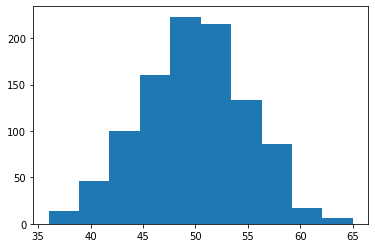

In [17]:
dist = [roll_n_coins(100) for _ in range(1000)]
plt.hist(dist)

### 隨機變數運算
若 $X$ 和 $Y$ 為兩個隨機變數  
則 $X+Y$ 的意思是  
每次事件發生後  
算出記錄 $X$ 和 $Y$ 的數值  
並將其相加

$X$ 和 $Y$ 有可能是有關連性的

In [18]:
X = lambda :np.random.choice([0,1]) # p = 0.5

def Z():
    x = X()
    y = x
    return x + y

In [19]:
Z() ### Z = X+X 只有可能是 0 或 2

2

$X$ 和 $Y$ 也有可能是獨立的

In [20]:
X = lambda :np.random.choice([0,1]) # p = 0.5

def Z():
    x = X()
    y = X()
    return x + y

In [21]:
Z()

2

隨機變數 $X$ 也可以乘上一個實數 $k$  
$kX$ 的意思是
每次事件發生後  
算出記錄 $X$ 的數值  
並將其乘上 $k$

In [22]:
X = lambda :np.random.choice([0,1]) # p = 0.5

def Z():
    x = X()
    return 2*x

In [23]:
Z() ### 所以 Z = 2X = X+X

0

因次一個二項分數 $Z$  
其實就是把獨立的 $n$ 個伯努利分布相加  
$Z = X_1 + \cdots + X_n$

### 連續隨機變數
隨機變數的數值不見得只有有限個  
也有可能是實數線上無窮多個數  
這類的隨機變數表現很不一樣  
（比如說機率等於零還是有可能發生）  
它們稱為**連續隨機變數**

其中一種常見的連續隨機變數叫**均勻分布**  
$X$ 的數值可能為一線段 $[a,b]$ 上的任一數  
而且每個數出現的機率一樣

In [24]:
X = lambda :np.random.random() # [a,b] = [0,1]

In [25]:
X()

0.7184732951325327

$X = 0.5$ 的機率等於零  
但還是有可能發生

In [26]:
X() == 0.5

False

另外一種常見的連續隨機變數叫**常態分布**  
（當平均為 0 且變異數為 1 的時候） 
它的分布圖形可以用數學式  
$f(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{1}{2}x^2}$  
來表示  

而 NumPy 中可以用 `np.random.randn(n)`  
來隨機產出 $n$ 個常態分布的數值

(array([ 1.,  1.,  0.,  0.,  4.,  1.,  2.,  4.,  4.,  5., 10., 11., 16.,
        26., 20., 35., 32., 35., 46., 33., 44., 33., 63., 47., 58., 48.,
        52., 61., 43., 48., 34., 39., 28., 26., 24., 14.,  9., 14.,  7.,
         3.,  3.,  8.,  1.,  0.,  2.,  2.,  0.,  1.,  1.,  1.]),
 array([-3.29069345, -3.1565578 , -3.02242216, -2.88828651, -2.75415086,
        -2.62001521, -2.48587956, -2.35174392, -2.21760827, -2.08347262,
        -1.94933697, -1.81520132, -1.68106568, -1.54693003, -1.41279438,
        -1.27865873, -1.14452308, -1.01038744, -0.87625179, -0.74211614,
        -0.60798049, -0.47384484, -0.3397092 , -0.20557355, -0.0714379 ,
         0.06269775,  0.1968334 ,  0.33096905,  0.46510469,  0.59924034,
         0.73337599,  0.86751164,  1.00164729,  1.13578293,  1.26991858,
         1.40405423,  1.53818988,  1.67232553,  1.80646117,  1.94059682,
         2.07473247,  2.20886812,  2.34300377,  2.47713941,  2.61127506,
         2.74541071,  2.87954636,  3.01368201,  3.14781765,

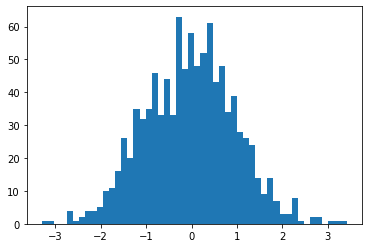

In [27]:
dist = np.random.randn(1000)
plt.hist(dist, bins=50)

## 統計
統計常常用事後觀察到的現象  
來評估一個隨機變數

### 平均值

#### 隨機變數的平均值
若一個隨機變數 $X$ 只有有限個可能的值  
則它的**平均值**（又稱**期望值**）為  
$\mathbb{E}(X) = \sum_k k\cdot\operatorname{Pr}(X=k)$  
其中 $\operatorname{Pr}(X=k)$ 為 $X=k$ 的機率

比如說一個公正骰子  
擲出來數字的期望值為  
$1\cdot\frac{1}{6} + \cdots + 6\cdot\frac{1}{6} = 3.5$

若連續投擲這個骰子直到出現 $1$ 才停止  
投擲次數的期望值為  
$1\cdot\frac{1}{6} + 2\cdot\frac{5}{6}\cdot\frac{1}{6} + 3\cdot\frac{5}{6}\cdot\frac{5}{6}\cdot\frac{1}{6} + \cdots = 6$  
（想想看 6 是怎麼算出來的）

In [28]:
total = 0
prob = 1/6
for i in range(1,101):
    total += i * prob
    prob = prob*5/6
print(N(total))

5.99999872008461


#### 利用樣本估計平均值
然而在真實世界裡  
事件發生的機率往往都不知道  
根據**大數法則**  
我們還是可以用大量的試驗樣本  
來估計隨機變數的平均值

先創造一個公正骰子  
（假裝你沒看到下方的程式碼  
而且你也不知道各個數字發生的機率）

In [29]:
X = lambda :np.random.choice([1,2,3,4,5,6])

In [30]:
X()

2

擲出數字的平均值 $\sim$ 擲出數字總和 / 投擲次數

In [31]:
total = sum(X() for _ in range(1000))
print(total/1000.0)

3.471


擲出 1 所須次數的平均值 $\sim$ 每輪投擲次數 / 輪數

In [32]:
def get_a_one():
    i = 1
    while True:
        if X() == 1:
            break
        else:
            i += 1
    return i

In [33]:
get_a_one()

3

In [34]:
total = sum(get_a_one() for _ in range(1000))
print(total/1000.0)

5.65300000000000


比較一下估算的平均數和真正的平均數是否相近

### 變異數
平均值描述了一個分布的中間值  
變異數則是用來描述一個分布的分散程度  
（常聽到的**標準差**是變異數的根號）

#### 隨機變數的變異數（母體變異數）
若一個隨機變數 $X$ 只有有限個可能的值  
則它的**變異數**為  
$\operatorname{Var}(X) = \mathbb{E}[(X - \mu)^2] = \sum_k (k-\mu)^2\cdot\operatorname{Pr}(X=k)$  
其中 $\mu = \mathbb{E}(X)$ 為 $X$ 的平均值

以擲公正骰子來說  
擲出數字的變異數為  
$(1-3.5)^2\cdot\frac{1}{6} + \cdots + (6-3.5)^2\cdot\frac{1}{6} = \frac{35}{12}$

In [35]:
sum((i - 3.5)^2 / 6 for i in range(1,7))

2.91666666666667

擲出 1 的次數的變異數為  
$(1-6)^2\cdot\frac{1}{6} + (2-6)^2\cdot\frac{5}{6}\cdot\frac{1}{6} + (3-6)^2\cdot\frac{5}{6}\cdot\frac{5}{6}\cdot\frac{1}{6} + \cdots = 30$

In [36]:
total = 0
prob = 1/6
for i in range(1,101):
    total += (i-6)^2 * prob
    prob = prob*5/6
print(N(total))

29.9998788910251


#### 利用樣本估計變異數（樣本變異數）
如果抽出 $N$ 個樣本 $x_1, \ldots, x_N$  
我們可先*估算*平均值  
$\mu = \frac{1}{N}(x_1 + \cdots + x_N)$  
因為每一個樣本出現的機率為 $\frac{1}{N}$  
如此可以估算出變異數  
$\frac{1}{N}\sum_{i=1}^N(x_i-\mu)^2$  

（注意這裡我們是用  
估算出的平均數  
再來估算變異數）

用同樣一顆公正骰子

In [37]:
X = lambda :np.random.choice([1,2,3,4,5,6])

In [38]:
X()

2

估算擲出數字的變異數

In [39]:
samples = [X() for i in range(10000)]
mu = sum(samples) / 10000
square_sum = sum((sample - mu)^2 for sample in samples)
print(square_sum/10000.0)

2.9276959600001438


估算擲出 1 所須次數的變異數

In [40]:
def get_a_one():
    i = 1
    while True:
        if X() == 1:
            break
        else:
            i += 1
    return i

In [41]:
get_a_one()

6

In [42]:
samples = [get_a_one() for i in range(10000)]
mu = sum(samples) / 10000
square_sum = sum((sample - mu)^2 for sample in samples)
print(square_sum/10000.0)

30.0245420400000


比較一下估算的變異數和真正的變異數是否相近

## 動手試試看

##### 練習 1

定義一個函數 `B(p, n)` 其功能為：  
處理伯努利分布的函數，其中傳入值要有成功機率 `p`、樣本數 `n`  
並回傳成功的次數

In [ ]:
### your answer here

##### 練習 2

試著運用上一題寫出的函數  
定義出一個新的函數 `Binomial(p, n, times)`其功能為：  
執行 `B` 函數 `times` 次  
將其結果記錄在一個 `list` 中並回傳  

In [ ]:
### your answer here

##### 練習 3

試著將上一題的函數結果用長條圖表示出來  
並觀察它和常態分布的圖形有何差異

In [ ]:
### your answer here

##### 練習 4

定義一個函數 `Two_Dices()` 其功能為：     
回傳同時擲出兩個骰子的結果和

In [ ]:
### your answer here

##### 練習 5

運用上一題的函數  
定義一個函數 `Two_Dices_Mean(n)` 其功能為：    
回傳做 `n` 次 `Two_Dices(n)` 試驗後的平均值  
其中 `n` 代表實驗次數

In [ ]:
### your answer here

##### 練習 6

定義一個函數 `Two_Dices_Variance(n)` 其功能為：    
計算 `n` 次 `Two_Dices(n)` 試驗後的變異數  
其中 `n` 代表實驗次數

In [ ]:
### your answer here

##### 練習 7

假設一個箱子中有 4 個白球、3 個紅球、3 個藍球  
定義一個函數其功能為：    
回傳連續抽樣 3 顆球的結果  
且之中取樣不放回

In [ ]:
### your answer here

##### 練習 8

使用上一題的函數，  
定義一個函數計算在實驗次數 `n` 之下  
連續抽 3 顆球的顏色依序是[紅、白、白]機率是多少

In [ ]:
### your answer here

##### 練習 9

以上面提到的常態分佈函數 `np.random.randn()`  
定義一個函數 `Normal_1(n)`  
以大量樣本數 `n`，計算抽出的值落於**平均值±1標準差**的機率  

In [ ]:
### your answer here

##### 練習 10

以上面提到的常態分佈函數 `np.random.randn()`  
定義一函數 `Normal_2(n)`  
以大量樣本數 `n`，計算抽出的值落於**平均值±2標準**的機率  

In [ ]:
### your answer here

##### 練習11
早期的教科書中樣本變異數的公式為  
$\frac{1}{N-1}\sum_{i=1}^N(x_i-\mu)^2$  
（也就是要除以 $N-1$ 而不是 $N$）

下方的 `sample_var` 函數可以計算 `X` 這個隨機變數  
在取樣 `num_samples` 次後所得的樣本變異數，  
同時這個函數提供 `ver='n'` 和 `ver='n-1'` 的兩個版本。

In [ ]:
X = lambda :np.random.choice([1,2,3,4,5,6])

def sample_var(X, num_samples=10, ver='n'):
    samples = [X() for i in range(num_samples)]
    mu = sum(samples) / num_samples
    square_sum = sum((sample - mu)^2 for sample in samples)
    if ver == 'n':
        return square_sum/float(num_samples)
    if ver == 'n-1':
        return square_sum/float(num_samples-1)

把 `num_samples` 調很大看看  
出來得答案是不是很接近 `X` 的母體變異數？

In [ ]:
### your answer here

另外一種辦法，就是把 `sample_var` 執行很多次再取平均  
試試看哪一個版本的平均會比較接近 `X` 的母體變異數？

In [ ]:
### your answer here